In [1]:
import pandas as pd

In [2]:
data = pd.read_json("data/wsbData.json", lines=True, chunksize = 1000) 

In [3]:
data

In [28]:
sample = next(data)
sample

,body,score_hidden,archived,name,author,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,author_flair_text,author_flair_css_class,distinguished
1000,Hopefully keep skyrocketing!! And let's hope m...,False,True,t1_cf381i7,[deleted],0,1391132318,t5_2th52,t3_1wknln,t1_cf33ynq,1,1432184065,0,0,cf381i7,wallstreetbets,1,NaN,NaN,NaN
1001,NQ has tanked over the last week or so. I boug...,False,True,t1_cgd8i83,Jackson3125,0,1395928827,t5_2th52,t3_21i5gc,t3_21i5gc,1,1433091450,0,0,cgd8i83,wallstreetbets,1,NaN,NaN,NaN
1002,Way too illiquid for my liking.\n\nStaying awa...,False,True,t1_cg0ydrf,thekeanu,0,1394653348,t5_2th52,t3_208b7j,t3_208b7j,1,1432771788,0,0,cg0ydrf,wallstreetbets,1,NaN,NaN,NaN
1003,I made some money on the first run of this sto...,False,True,t1_cekis7h,faggaren,0,1389200611,t5_2th52,t3_1uckpe,t3_1uckpe,1,1431854411,0,0,cekis7h,wallstreetbets,1,NaN,NaN,NaN
1004,did you get in?,False,True,t1_cjb9jkr,captainloveboat,0,1406661453,t5_2th52,t3_2bhshp,t1_cj6dfon,1,1434960909,0,0,cjb9jkr,wallstreetbets,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,my bad didn't realize this was illegal. The m...,False,True,t1_cg6cbs0,DontBuy123,0,1395213779,t5_2th52,t3_20sjor,t1_cg6c2ib,0,1432972234,1,0,cg6cbs0,wallstreetbets,0,NaN,NaN,NaN
1996,[deleted],False,False,t1_clhawuh,[deleted],0,1414040597,t5_2th52,t3_2k20z6,t3_2k20z6,1,1426393213,0,0,clhawuh,wallstreetbets,1,NaN,NaN,NaN
1997,I agree. If you feel emotions you are doing i...,False,True,t1_ckm27ze,schlunt,0,1411068571,t5_2th52,t3_2gimdj,t1_ckjizi8,1,1426939481,0,0,ckm27ze,wallstreetbets,1,NaN,NaN,NaN
1998,[deleted],False,True,t1_cf23v24,[deleted],0,1391030032,t5_2th52,t3_1wh0ed,t1_cf23s5u,1,1432164266,0,0,cf23v24,wallstreetbets,1,NaN,NaN,NaN


In [ ]:
text = "\n".join([str(x).replace("\n", "") for x in sample["body"]])
"""{}""".format(text)

In [ ]:
vocab = set(text)
e_vocab = lambda a:sorted(set(list(vocab) + list(a))) 
e_vocab("だ💪づ⠩")

In [39]:
def process(chunk):
    chunk["len"] = chunk["body"].str.len()
    chunk = chunk.loc[chunk["len"]<250, ["score","body","len"]]
    temp = chunk.loc[chunk["body"] != "[deleted]", ["score","body","len"]]
    return temp.loc[temp["score"]>0]

process(sample)

,score,body,len
1000,1,Hopefully keep skyrocketing!! And let's hope m...,125
1001,1,NQ has tanked over the last week or so. I boug...,100
1002,1,Way too illiquid for my liking.\n\nStaying awa...,60
1003,1,I made some money on the first run of this sto...,130
1004,1,did you get in?,15
...,...,...,...
1986,2,"NASDAQ:NEWL\n\nIf you win, I hope you buy me a...",49
1989,2,NKE,3
1990,2,"I've seen this movie twice, DiCaprio is at his...",52
1993,7,God damn you have no idea what you're talking ...,53


In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distro(data, step = 1):
    axis = np.arange(start=min(data), stop = max(data) + 1, step=step)
    plt.hist(data, bins = axis)

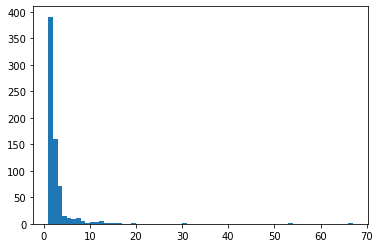

In [41]:
plot_distro(process(sample)["score"])


In [16]:
process(sample)

,score,body
1,1,"Lol. Yeah, Welp."
3,1,Crypto miners is not a significant enough mark...
4,1,Sold a covered call at 560. I almost wish it d...
5,1,NFLX because earning reports releases. +10-12%...
6,1,Agreed 100%. When are their earnings? I'd like...
...,...,...
995,1,Feel free to swap my calls with puts and it wo...
996,1,"Well, the 20-f being delayed at this point is ..."
997,1,"*speculation warning*\n\nHonestly, I see Yahoo..."
998,1,Couldn't someone have said that every 6 months...


# Writting

In [7]:
from tqdm import tqdm

In [42]:
header = True
with pd.read_json("data/wsbData.json", lines=True, chunksize = 10000) as reader:
    for chunk in tqdm(reader):
        process(chunk).to_csv("data/wsbWeighted.csv", header=header, mode='a')  
        header = False

298it [01:05,  4.54it/s]


In [43]:
with pd.read_csv("data/wsbWeighted.csv", chunksize = 10000) as reader:
    print(next(reader))

      Unnamed: 0  score                                               body  \
0            1.0      1                                   Lol. Yeah, Welp.   
1            4.0      1  Sold a covered call at 560. I almost wish it d...   
2            5.0      1  NFLX because earning reports releases. +10-12%...   
3            6.0      1  Agreed 100%. When are their earnings? I'd like...   
4            8.0      1  as much as i want to just take the risk here, ...   
...          ...    ...                                                ...   
9995     13835.0      2             You fantasize about 12 year ilds alot?   
9996     13836.0      2  Hostilities detected. Threat removed\n\n*I am ...   
9997     13837.0      2      Textbooks, Khan Academy, Schwab, Investopedia   
9998     13838.0      2  I noticed that as well. I'll do my own DD once...   
9999     13840.0      2                     Uhhh a computer? Fucking moron   

        len  
0      16.0  
1     159.0  
2      72.0  
3      

In [44]:
vocab = {}
e_vocab = lambda a,b:set(list(a) + list(b))
with pd.read_csv("data/wsbWeighted.csv", chunksize = 10000) as reader:
    for chunk in tqdm(reader):
        text = "\n".join([str(x).replace("\n", "") for x in chunk["body"]])
        with open("data/wsb_script.txt", "a") as f:
            print(text, file=f)
        vocab = e_vocab(vocab,text)
        

245it [00:08, 27.29it/s]


In [46]:
import pickle

with open("data/wsb_vocab.pickle", "wb") as f:
    pickle.dump(sorted(vocab), f)
sorted(vocab)

['\x02',
 '\t',
 '\n',
 '\r',
 '\x0e',
 '\x10',
 '\x14',
 '\x16',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x92',
 '\xa0',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '¦',
 '§',
 '¨',
 '©',
 '«',
 '¬',
 '®',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¸',
 'º',
 '»',
 '¼',
 '½',
 '¿',
 'À',
 'Á',
 'Ä',
 'Å',
 'Æ',
 'È',
 'É',
 'Ê',
 'Ë',
 'Ï',
 'Ð',
 'Ñ',
 'Ó',
 'Ö',
 '×',
 'Ø',
 'Û',
 'Ü',
 'Þ',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì

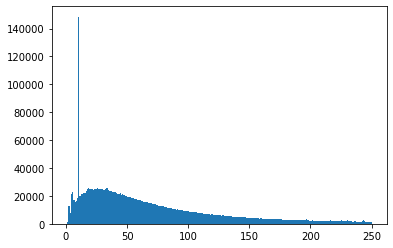

In [45]:
lens = []
with open("data/wsb_script.txt", "r") as f:
    for line in f:
        lens.append(len(line))
plot_distro(lens)